<a href="https://colab.research.google.com/github/maulanaakbardj/Data-Analysis-in-Social-Science/blob/main/Code_Hands_On_JSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis Sederhana Dataset COVID-19 DKI Jakarta
Oleh: Maulana Akbar Dwijaya - Kandidat Data Science JSC Trainee Gelombang 3 (Agustus - Oktober 2021)


## Perumusan Masalah
Terhitung pada tanggal 2 Agustus 2021, pandemi Covid-19 (Corona Virus Disease 2019) telah melanda Indonesia sudah 1 tahun lebih, sejak pemerintah Indonesia mengumumkan ditemukannya dua kasus pertama Covid-19 pada 2 Maret 2020. Sejak saat itu, berbagai usaha telah dilakukan baik oleh pemerintah pusat maupun pemerintah daerah untuk menekan laju penyebaran dan fatalitas Covid-19. Pemprov DKI Jakarta telah berulang kali menerapkan Pembatasan Sosial Berskala Besar (PSBB), mulai dari tiga fase PSBB ketat, PSBB transisi, Pemberlakuan Pembatasan Kegiatan Masyarakat (PPKM) mikro - darurat dan Level 4 Jawa-Bali yang diperpanjang sampai 9 Agustus 2021

Hal ini cukup menarik perhatian dengan mulai munculnya skeptisisme dan sentimen negatif di kalangan masyarakat mengenai efektivitas aturan Pembatasan Sosial Pembatasan Kegiatan Masyarakat (PPKM) darurat. Dengan menggunakan dataset yang diperoleh dari situs resmi pemantauan Covid-19 Pemprov DKI Jakarta corona.jakarta.go.id, saya melakukan studi perbandingan sederhana dengan melakukan analisis statistik kondisi pandemi sebelum dan sesudah dimulainya PPKM.






## Hipotesis

1.   Hipotesis Awal : Tidak adanya korelasi aturan PPKM terhadap penurunan laju penyebaran dan fatalitas kasus Covid-19 secara keseluruhan di DKI Jakarta.
2.   Hipotesis Kedua: Adanya korelasi (positif) antara aturan PPKM terhadap penurunan laju penyebaran dan fatalitas kasus Covid-19 secara keseluruhan di DKI Jakarta.


## Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url_data= "https://tiny.cc/Datacovidjakarta"
data = pd.read_excel(url_data)


Digunakan dataset ‘Data Jakarta’ pada data yang diperoleh secara langsung
dari link tiny.cc/Datacovidjakarta. Terdapat 14 variabel pada dataset ini, yaitu:

In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Tanggal          521 non-null    datetime64[ns]
 1   Jam              502 non-null    float64       
 2   Tanggal Jam      521 non-null    datetime64[ns]
 3   Meninggal        521 non-null    int64         
 4   Sembuh           521 non-null    int64         
 5   Self Isolation   521 non-null    int64         
 6   Masih Perawatan  521 non-null    int64         
 7   Total Pasien     521 non-null    int64         
 8   Positif Harian   521 non-null    int64         
 9   Positif Aktif    521 non-null    int64         
 10  Sembuh Harian    521 non-null    int64         
 11  Tanpa Gejala     381 non-null    float64       
 12  Bergejala        381 non-null    float64       
 13  Belum Ada Data   381 non-null    float64       
dtypes: datetime64[ns](2), float64(4), int64(8)

,Tanggal,Jam,Tanggal Jam,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
0,2020-03-01,NaN,2020-03-01 18:00:00,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2020-03-02,NaN,2020-03-02 18:00:00,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2020-03-03,NaN,2020-03-03 18:00:00,1,0,0,2,3,3,2,0,NaN,NaN,NaN
3,2020-03-04,NaN,2020-03-04 18:00:00,1,0,0,2,3,0,2,0,NaN,NaN,NaN
4,2020-03-05,NaN,2020-03-05 18:00:00,3,0,0,4,7,4,4,0,NaN,NaN,NaN


Dari 14 variabel tersebut, akan digunakan variabel inti berikut dalam proses analisis:
* Tanggal: Digunakan sebagai index dari dataset secara keseluruhan
* Positif Harian: Untuk menganalisis informasi perkembangan laju penyebaran
* Positif Aktif: Untuk memperoleh informasi kondisi sebaran setiap waktu

In [ ]:
data[['Tanggal','Positif Harian', 'Positif Aktif']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tanggal         521 non-null    datetime64[ns]
 1   Positif Harian  521 non-null    int64         
 2   Positif Aktif   521 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 12.3 KB


In [ ]:
data[['Positif Harian', 'Positif Aktif']].describe()

,Positif Harian,Positif Aktif
count,521.000000,521.000000
mean,1574.596929,13975.919386
std,2356.788055,19689.151571
min,0.000000,0.000000
25%,239.000000,4618.000000
50%,926.000000,8398.000000
75%,1588.000000,13140.000000
max,14619.000000,113138.000000


### Analisis Awal
Pertama akan dilakukan analisis tren setiap variabel terhadap variabel ‘Tanggal’ yang menjadi indeks dataset.

In [ ]:
data['Hari'] = np.arange(1, len(data)+1, 1)

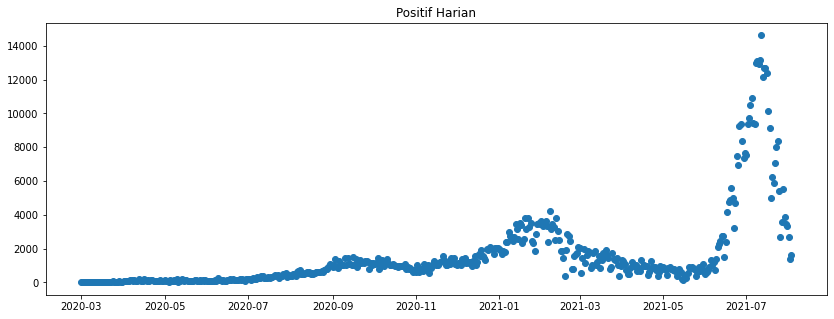

In [ ]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('Positif Harian')
ax1.scatter(x=data['Tanggal'], y=data['Positif Harian'])

In [ ]:
data[['Hari', 'Positif Harian']].cov()

,Hari,Positif Harian
Hari,22663.500000,2.094790e+05
Positif Harian,209478.955769,5.554450e+06


Visualisasi tersebut membuktikan analisis data positif harian pada awal kasus berada pada level yang rendah, namun terjadi kenaikan secara eksponensial pada September 2020 sampai awal tahun 2021, kurva mulai melandai tepat setahun kasus pertama di Indonesia dan mengalami kenaikan yang signifikan pada Juni-Juli 2021. Analisis kovarians yang memberikan nilai positif (2.094790e+05) menunjukkan tren kenaikan data. Penurunan data di akhir data (3 Agustus 2021).

---



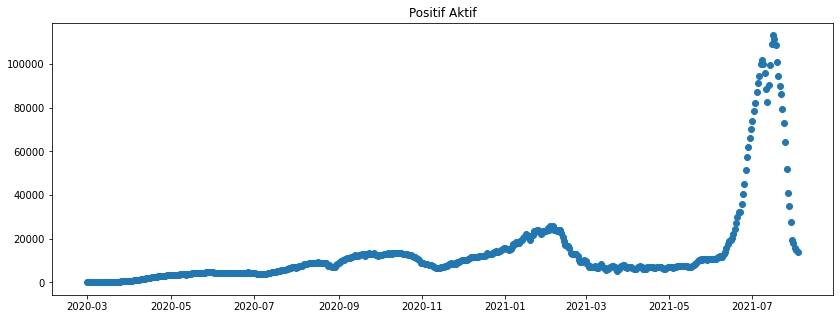

In [ ]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('Positif Aktif')
ax1.scatter(x=data['Tanggal'], y=data['Positif Aktif'])

In [ ]:
data[['Hari', 'Positif Aktif']].cov()

,Hari,Positif Aktif
Hari,2.266350e+04,1.638682e+06
Positif Aktif,1.638682e+06,3.876627e+08


Visualisasi ini juga membuktikan analisis awal sebelumnya bahwa mayoritas data positif aktif berada pada level yang rendah, namun terjadi kenaikan signifikan pada Juni-Juli 2021 dan mengalami penurunan pada kuartal akhir data (3 Agustus 2021)

---



## Initial data assessment 
Pada bagian ini, dilakukan comparison ketiga aspek variabel sebelum aturan PPKM darurat mulai dilaksanakan (sebelum 6 Juli 2021) dengan setelah aturan PPKM darurat mulai dilaksanakan (setelah 6 Juli 2021) dengan menggunakan tendensi
sentral data.

In [ ]:
data.loc[data['Tanggal'] == '2021-07-06']

,Tanggal,Jam,Tanggal Jam,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data,Hari
492,2021-07-06,8.0,2021-07-06 07:59:59.712,8861,497492,65448,29136,600937,9439,94584,5936,18451.0,60476.0,15657.0,493


In [ ]:
data.loc[data['Tanggal'] == '2021-01-11']

,Tanggal,Jam,Tanggal Jam,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data,Hari
316,2021-01-11,8.0,2021-01-11 07:59:59.712,3551,187086,13541,4405,208583,2461,17946,2510,5180.0,9246.0,3520.0,317


In [ ]:
mulai_tgl = 493  # 6 Juli 2021
mulai_index = data['Hari'][data.index==mulai_tgl].values[0]-1

In [ ]:
print('Penambahan Kasus Positif Harian Mulai PPKM 11 Januari 2021 Sebelum PPKM Darurat 6 Juli 2021')
print(data['Positif Harian'].iloc[316:mulai_index].describe())
print()
print('Penambahan Kasus Positif Harian Mulai PPKM 11 Januari 2021 Setelah PPKM Darurat 6 Juli 2021')
print(data['Positif Harian'].iloc[mulai_index:].describe())

Penambahan Kasus Positif Harian Mulai PPKM 11 Januari 2021 Sebelum PPKM Darurat 6 Juli 2021
count      177.000000
mean      2230.593220
std       2190.318593
min        161.000000
25%        845.000000
50%       1437.000000
75%       2872.000000
max      10903.000000
Name: Positif Harian, dtype: float64

Penambahan Kasus Positif Harian Mulai PPKM 11 Januari 2021 Setelah PPKM Darurat 6 Juli 2021
count       28.000000
mean      7836.714286
std       4233.868854
min       1410.000000
25%       3775.500000
50%       7545.500000
75%      12478.000000
max      14619.000000
Name: Positif Harian, dtype: float64


In [ ]:
tes=data.iloc[316:492]
tes

,Tanggal,Jam,Tanggal Jam,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data,Hari
316,2021-01-11,8.0,2021-01-11 07:59:59.712,3551,187086,13541,4405,208583,2461,17946,2510,5180.0,9246.0,3520.0,317
317,2021-01-12,8.0,2021-01-12 07:59:59.712,3589,188675,14591,4397,211252,2669,18988,1589,6861.0,10618.0,1509.0,318
318,2021-01-13,8.0,2021-01-13 07:59:59.712,3634,191635,15009,4450,214728,3476,19459,2960,6757.0,10186.0,2516.0,319
319,2021-01-14,8.0,2021-01-14 07:59:59.712,3675,193719,15852,4647,217893,3165,20499,2084,5878.0,10055.0,4566.0,320
320,2021-01-15,8.0,2021-01-15 07:59:59.712,3710,195924,15553,5247,220434,2541,20800,2205,5182.0,9366.0,6252.0,321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2021-07-01,8.0,2021-07-01 07:59:59.712,8528,468461,49836,24184,551009,7541,74020,3518,13902.0,26151.0,33967.0,488
488,2021-07-02,8.0,2021-07-02 07:59:59.712,8547,473467,53014,25380,560408,9399,78394,5006,12103.0,25076.0,41215.0,489
489,2021-07-03,8.0,2021-07-03 07:59:59.712,8577,479150,54941,27442,570110,9702,82383,5683,11310.0,21941.0,49132.0,490
490,2021-07-04,8.0,2021-07-04 07:59:59.712,8652,484949,59307,27687,580595,10485,86994,5799,8799.0,20101.0,58094.0,491


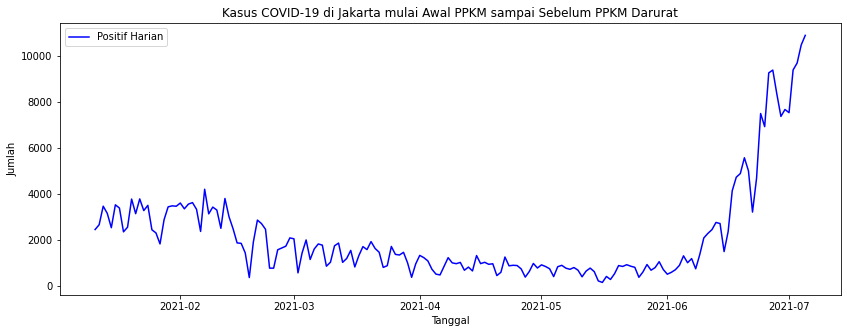

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 5)

ax.plot(tes['Tanggal'], tes['Positif Harian'], color= 'b', label='Positif Harian')
ax.set_xlabel('Tanggal')
ax.set_ylabel('Jumlah')
ax.set_title('Kasus COVID-19 di Jakarta mulai Awal PPKM sampai Sebelum PPKM Darurat')
ax.legend()
plt.savefig('plot1.png')
plt.show()


In [ ]:
tes2=data.iloc[492:]
tes2

,Tanggal,Jam,Tanggal Jam,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data,Hari
492,2021-07-06,8.0,2021-07-06 07:59:59.712,8861,497492,65448,29136,600937,9439,94584,5936,18451.0,60476.0,15657.0,493
493,2021-07-07,8.0,2021-07-07 07:59:59.712,9042,501199,69644,30418,610303,9366,100062,3707,18376.0,57521.0,24165.0,494
494,2021-07-08,8.0,2021-07-08 07:59:59.712,9110,512085,72361,29721,623277,12974,102082,10886,14748.0,50824.0,36510.0,495
495,2021-07-09,8.0,2021-07-09 07:59:59.712,9306,526941,73239,26903,636389,13112,100142,14856,10095.0,40727.0,49320.0,496
496,2021-07-10,8.0,2021-07-10 07:59:59.712,9357,543867,71812,24273,649309,12920,96085,16926,7999.0,26379.0,61707.0,497
497,2021-07-11,8.0,2021-07-11 07:59:59.712,9395,564437,68251,20359,662442,13133,88610,20570,4769.0,12893.0,70948.0,498
498,2021-07-12,8.0,2021-07-12 07:59:59.712,9462,584912,66581,16106,677061,14619,82687,20475,17649.0,25597.0,39441.0,499
499,2021-07-13,8.0,2021-07-13 07:59:59.712,9541,589486,71848,18368,689243,12182,90216,4574,16957.0,22339.0,50920.0,500
500,2021-07-14,8.0,2021-07-14 07:59:59.712,9603,592556,78571,21180,701910,12667,99751,3070,32752.0,54463.0,12536.0,501
501,2021-07-15,8.0,2021-07-15 07:59:59.712,9743,595582,86298,22978,714601,12691,109276,3026,31922.0,52360.0,24994.0,502


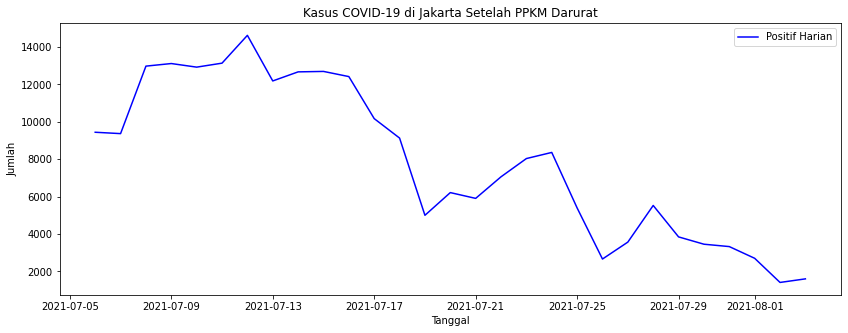

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 5)

ax.plot(tes2['Tanggal'], tes2['Positif Harian'], color= 'b', label='Positif Harian')
ax.set_xlabel('Tanggal')
ax.set_ylabel('Jumlah')
ax.set_title('Kasus COVID-19 di Jakarta Setelah PPKM Darurat')
ax.legend()
plt.savefig('plot2.png')
plt.show()

# Kesimpulan

Berdasarkan analisis statistik sederhana yang telah dilakukan menggunakan dataset dari situs
resmi pemantauan Covid-19 Pemprov DKI Jakarta https://tiny.cc/Datacovidjakarta, diperoleh hasil
sebagai berikut:
    
- Jika dilihat secara jumlah kasus (kuantitas), terjadi penurunan laju penyebaran (positif harian) signifikan setelah aturan PPKM Darurat dilakukan
dilaksanakan di DKI Jakarta pada 6 Juli 2021.

# Deep Learning: Recurrent Neural Networks Studi Kasus PPKM 

In [ ]:
training_set = tes2.iloc[:, 8:9].values

In [ ]:
training_set

array([[ 9439],
       [ 9366],
       [12974],
       [13112],
       [12920],
       [13133],
       [14619],
       [12182],
       [12667],
       [12691],
       [12415],
       [10168],
       [ 9128],
       [ 5000],
       [ 6213],
       [ 5904],
       [ 7058],
       [ 8033],
       [ 8360],
       [ 5393],
       [ 2662],
       [ 3567],
       [ 5525],
       [ 3845],
       [ 3454],
       [ 3327],
       [ 2701],
       [ 1410],
       [ 1601]])

## Proses feature scaling
proses preprocessing dengan metode normalisasi. Perintah yang kita tuliskan adalah MinMaxScaler, kemudian diikuti dengan feature_range = (0,1) yang artinya rentangnya antara 0 (nilai minimum) hingga 1 (nilai maksimum).



In [50]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled 

array([[0.60784314],
       [0.6023166 ],
       [0.8754637 ],
       [0.88591112],
       [0.87137558],
       [0.88750095],
       [1.        ],
       [0.81550458],
       [0.85222197],
       [0.85403891],
       [0.83314407],
       [0.66303278],
       [0.58429858],
       [0.27178439],
       [0.36361572],
       [0.34022258],
       [0.42758725],
       [0.50140056],
       [0.52615641],
       [0.30153683],
       [0.09478386],
       [0.16329775],
       [0.31153002],
       [0.18434401],
       [0.15474298],
       [0.14512832],
       [0.09773639],
       [0.        ],
       [0.01445984]])

In [51]:
# Membuat prediksi dengan 3 time-window 
X_train = []
y_train = []
for i in range(3, training_set.shape[0]):
    X_train.append(training_set_scaled[i-3:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train

array([[0.60784314, 0.6023166 , 0.8754637 ],
       [0.6023166 , 0.8754637 , 0.88591112],
       [0.8754637 , 0.88591112, 0.87137558],
       [0.88591112, 0.87137558, 0.88750095],
       [0.87137558, 0.88750095, 1.        ],
       [0.88750095, 1.        , 0.81550458],
       [1.        , 0.81550458, 0.85222197],
       [0.81550458, 0.85222197, 0.85403891],
       [0.85222197, 0.85403891, 0.83314407],
       [0.85403891, 0.83314407, 0.66303278],
       [0.83314407, 0.66303278, 0.58429858],
       [0.66303278, 0.58429858, 0.27178439],
       [0.58429858, 0.27178439, 0.36361572],
       [0.27178439, 0.36361572, 0.34022258],
       [0.36361572, 0.34022258, 0.42758725],
       [0.34022258, 0.42758725, 0.50140056],
       [0.42758725, 0.50140056, 0.52615641],
       [0.50140056, 0.52615641, 0.30153683],
       [0.52615641, 0.30153683, 0.09478386],
       [0.30153683, 0.09478386, 0.16329775],
       [0.09478386, 0.16329775, 0.31153002],
       [0.16329775, 0.31153002, 0.18434401],
       [0.

In [52]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.60784314],
        [0.6023166 ],
        [0.8754637 ]],

       [[0.6023166 ],
        [0.8754637 ],
        [0.88591112]],

       [[0.8754637 ],
        [0.88591112],
        [0.87137558]],

       [[0.88591112],
        [0.87137558],
        [0.88750095]],

       [[0.87137558],
        [0.88750095],
        [1.        ]],

       [[0.88750095],
        [1.        ],
        [0.81550458]],

       [[1.        ],
        [0.81550458],
        [0.85222197]],

       [[0.81550458],
        [0.85222197],
        [0.85403891]],

       [[0.85222197],
        [0.85403891],
        [0.83314407]],

       [[0.85403891],
        [0.83314407],
        [0.66303278]],

       [[0.83314407],
        [0.66303278],
        [0.58429858]],

       [[0.66303278],
        [0.58429858],
        [0.27178439]],

       [[0.58429858],
        [0.27178439],
        [0.36361572]],

       [[0.27178439],
        [0.36361572],
        [0.34022258]],

       [[0.36361572],
        [0.34022258],
    

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [54]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 3, 50)             10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 3, 50)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 3, 50)             20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 3, 50)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 3, 50)             20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 3, 50)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)               

In [55]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [56]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 0.3182
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 0.3109
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 0.3036
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 0.2964
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 0.2891
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 0.2796
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 0.2722
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 0.2626
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 0.2516
Epoch 10/100
1/1 [==============================] - 0s 25ms/step - loss: 0.2423
Epoch 11/100
1/1 [==============================] - 0s 27ms/step - loss: 0.2355
Epoch 12/100
1/1 [==============================] - 0s 26ms/step - loss: 0.2179
Epoch 13/100
1/1 [==============================] -

In [57]:
tes3 = {'Tanggal': ['2021-08-04','2021-08-05','2021-08-06','2021-08-07','2021-08-08','2021-08-09'],
        'Positif Harian' : [0,0,0,0,0,0]}
tes3 = pd.DataFrame(tes3)
kasus = tes3.iloc[:, 1:2].values

In [58]:
dataset_test = tes3
# Memprediksi laju kasus Positif harian selama perpanjangan PPKM
dataset_total = pd.concat((tes2['Positif Harian'], dataset_test['Positif Harian']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 7:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

In [59]:
for i in range(3, kasus.shape[0] + X_train.shape[1]):
    X_test.append(inputs[i-3:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted = model.predict(X_test)
predicted = sc.inverse_transform(predicted)

### Visualisasi perbandingan hasil prediksi New Section

In [62]:
predicted=np.around(predicted)
pred= pd.DataFrame(predicted, columns=['Prediksi Kasus'])
pred['Tanggal']=['2021-08-04','2021-08-05','2021-08-06','2021-08-07','2021-08-08','2021-08-09']
pred

,Prediksi Kasus,Tanggal
0,4144.0,2021-08-04
1,3530.0,2021-08-05
2,3373.0,2021-08-06
3,3214.0,2021-08-07
4,2900.0,2021-08-08
5,2558.0,2021-08-09


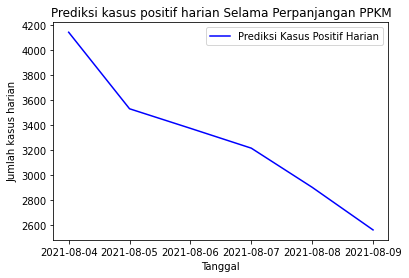

In [63]:
plt.plot(tes3['Tanggal'],predicted, color = 'blue', label = 'Prediksi Kasus Positif Harian')
plt.title('Prediksi kasus positif harian Selama Perpanjangan PPKM')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah kasus harian')
plt.legend()
plt.savefig('plot3.png')
plt.show()